### 1.- Set up the enviroment

In [130]:
### Some libraries 
import numpy as np ### Math stuff
from numpy import linalg as LA

import pandas as pd ### Manage tables
import matplotlib.pyplot as plt ### Plots

### 2.- Data

### 2.1 Functions

In [133]:
def pca(data,nRedDim=0):
    # Centre data
    m = np.mean(data,axis=0)
    data -= m
    # Covariance(correlation) matrix
    C = corrcoef(data)
    
    # Compute eigenvalues and sort into descending order
    evals,evecs = np.linalg.eigh(C) #eigh does everything
    #indices = np.argsort(evals)
    #indices = indices[::-1]
    #evecs = evecs[:,indices]   
    #evals = evals[indices]
    

    x = np.dot(np.transpose(evecs),np.transpose(data))
    # Compute the original data again
    y=np.transpose(np.dot(evecs,x))+m
    
    return x,y,evals,evecs


In [ ]:
def knn(k,data,dataClass,inputs):
    nInputs = np.shape(inputs)[0]
    closest = np.zeros(nInputs)
    for n in range(nInputs):
        # Compute distances
        distances = np.sum((data-inputs[n,:])**2,axis=1)
        #Identify the nearest neighbours
        indices = np.argsort(distances,axis=0)
        classes = np.unique(dataClass[indices[:k]])
        if len(classes)==1:
            closest[n] = np.unique(classes)
        else:
            counts = np.zeros(max(classes)+1)
            for i in range(k):
                counts[dataClass[indices[i]]] += 1
                closest[n] = np.max(counts)
    return closest

In [137]:
def distribution_comparison(listas=[], xlabel = ['Price','Volumen'], ylabel = ['P(Price)','P(V)'],
                           titulo = ['Price Distribution','Volumen Distribution'],couleur='blue'):
    fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (18,6))
    plt.subplots_adjust(wspace= 0.20,hspace = 0.30,top = 0.93)
    kwargs = dict(histtype='bar', alpha=0.2,ec = 'black',density = True)
    for i, lista in enumerate(listas):
        ax[i].hist(lista,bins = 50,**kwargs,color=couleur)
        ax[i].set_title(titulo[i])
        ax[i].set_ylabel(ylabel[i],fontsize = 12)
        ax[i].set_xlabel(xlabel[i], fontsize =12)
        ax[i].axvline(np.mean(lista),color = 'black',linestyle = ':' )
    plt.show()    


In [135]:
def correspondance(lista1,lista2,xlabel='Volume',ylabel='Price',titulo = 'Ideal Cut: Correspondace Price - Volumen'
                   ,color='blue'):
    plt.figure(figsize=(10,6))
    plt.scatter(lista2, lista1, marker='o', alpha=0.2, s=20,color=color)
    plt.ylabel(ylabel,fontsize=12)
    plt.xlabel(xlabel,fontsize=12)
    plt.title(titulo,fontsize=12)
    #plt.grid()
    plt.show()  

In [2]:
data_dictionary = pd.read_excel('C:\\Users\\Ale\\Documents\\ML\\data_dictionary1.xlsx',header = None)

In [9]:
data_dictionary

,0,1,2
0,carat,Carat weight of the diamond,Numeric
1,cut,Describe cut quality of the diamond. Quality i...,String
2,color,"Color of the diamond, with D being the best an...",String
3,clarity,How obvious inclusions are within the diamond:...,String
4,depth,"depth % :The height of a diamond, measured fro...",Numeric
5,table,table%: The width of the diamond's table expre...,Numeric
6,price,The price of the diamond in muggle money,Numeric
7,x,length of the diamond in mm,Numeric
8,y,width of the diamond in mm,Numeric
9,z,depth of the diamond in mm,Numeric


In [36]:
dat = pd.read_csv('C:\\Users\\Ale\\Documents\\ML\\diamonds_data.csv',sep=",",engine='python')#,header=None)

In [37]:
dat.shape

(53930, 10)

In [38]:
dat.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [13]:
#data['x']**2

### Approx  $$ V = xyz \left(cm^{3}\right)$$

In [39]:
dat['V'] = dat['x']*dat['y']*dat['z']

In [40]:
dat.drop(['x','y','z'], axis=1).head()

,carat,cut,color,clarity,depth,table,price,V
0,0.23,Ideal,E,SI2,61.5,55.0,326,38.202030
1,0.21,Premium,E,SI1,59.8,61.0,326,34.505856
2,0.23,Good,E,VS1,56.9,65.0,327,38.076885
3,0.29,Premium,I,VS2,62.4,58.0,334,46.724580
4,0.31,Good,J,SI2,63.3,58.0,335,51.917250


In [42]:
data = dat.drop(['x','y','z'], axis=1) ##Removing columns

In [18]:
## Looking for Nan values

In [43]:
null_columns=data.columns[data.isnull().any()] ##Perfect
data[null_columns].isnull().sum()   

Series([], dtype: float64)

### 3.- Collecting data by clusters

In [21]:
### I think the best way to start is collect the data by quality 

In [53]:
data['cut'].value_counts().index ### Cuts

Index(['Ideal', 'Premium', 'Very Good', 'Good', 'Fair'], dtype='object')

In [54]:
data['cut'].value_counts() ### How many

Ideal        21546
Premium      13788
Very Good    12082
Good          4904
Fair          1610
Name: cut, dtype: int64

In [55]:
Dic_rep = {}

In [56]:
for cut,num in zip(data['cut'].value_counts().index,data['cut'].value_counts() ):
    Dic_rep[cut] = num/len(data)

In [57]:
for cut in Dic_rep:
    print('Contribution',cut,'  ',"%3.4f"% (Dic_rep[cut]*100)+'%')

Contribution Ideal    39.9518%
Contribution Premium    25.5665%
Contribution Very Good    22.4031%
Contribution Good    9.0933%
Contribution Fair    2.9854%


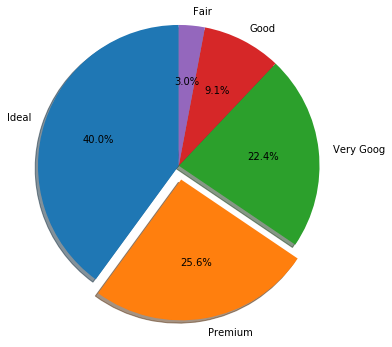

In [58]:
labels = 'Ideal', 'Premium', 'Very Goog', 'Good','Fair'
sizes = [39.95, 25.56, 22.40, 9.09,2.98]
explode = (0, 0.1, 0, 0,0)  

fig1, ax1 = plt.subplots(figsize=(6,6))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')  

plt.show()

In [78]:
df1 = data.loc[data['cut'] == 'Ideal']  #collecting te data
df2 = data.loc[data['cut'] == 'Premium']  
df3 = data.loc[data['cut'] == 'Very Good']  
df4 = data.loc[data['cut'] == 'Good']  
df5 = data.loc[data['cut'] == 'Fair']  


In [61]:
df1.head()

,carat,cut,color,clarity,depth,table,price,V
0,0.23,Ideal,E,SI2,61.5,55.0,326,38.202030
11,0.23,Ideal,J,VS1,62.8,56.0,340,37.704420
13,0.31,Ideal,J,SI2,62.2,54.0,344,51.515745
16,0.30,Ideal,I,SI2,62.0,54.0,348,50.130472
39,0.33,Ideal,I,SI2,61.8,55.0,403,56.294722


In [66]:
kwargs = dict(histtype='bar', alpha=0.2,ec = 'black',density = True)

In [136]:
###A Gaussian model wouldnt be a good model, the values are far from its avegare, nevertheless
                  ### It could be a linear correspondance  

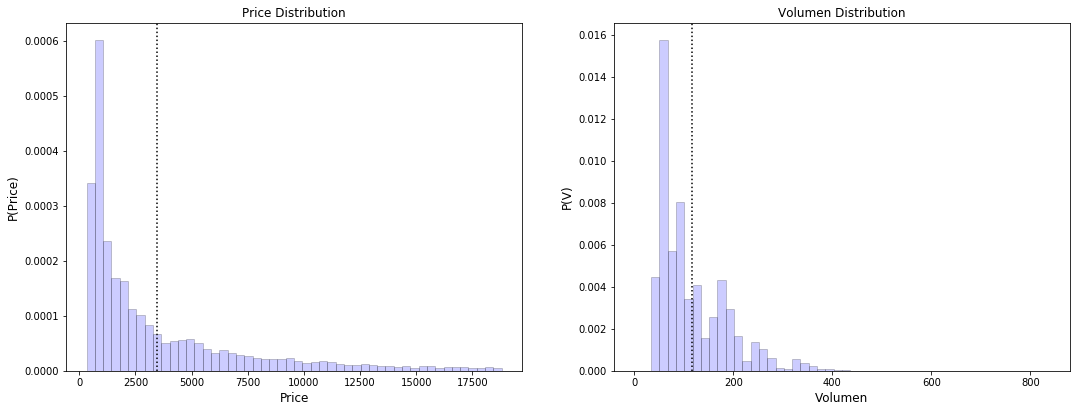

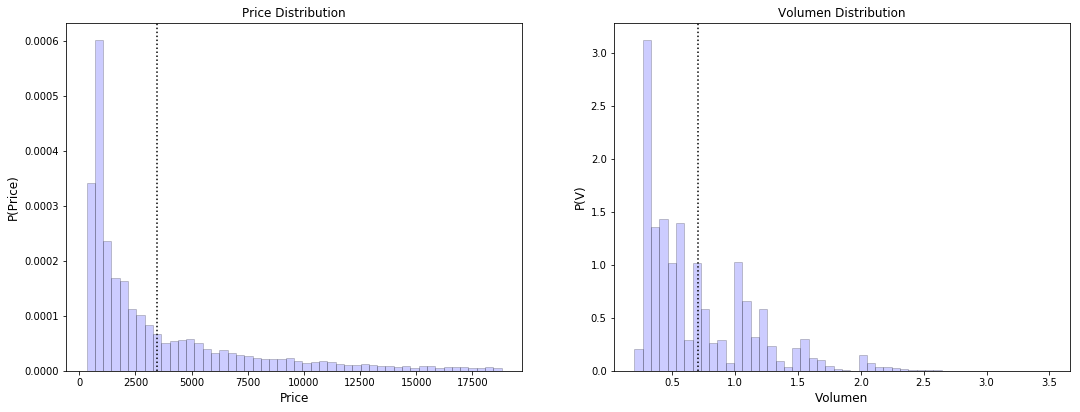

In [123]:
#Quality Ideal
distribution_comparison(listas=[df1['price'],df1['V']])
distribution_comparison(listas=[df1['price'],df1['carat']])

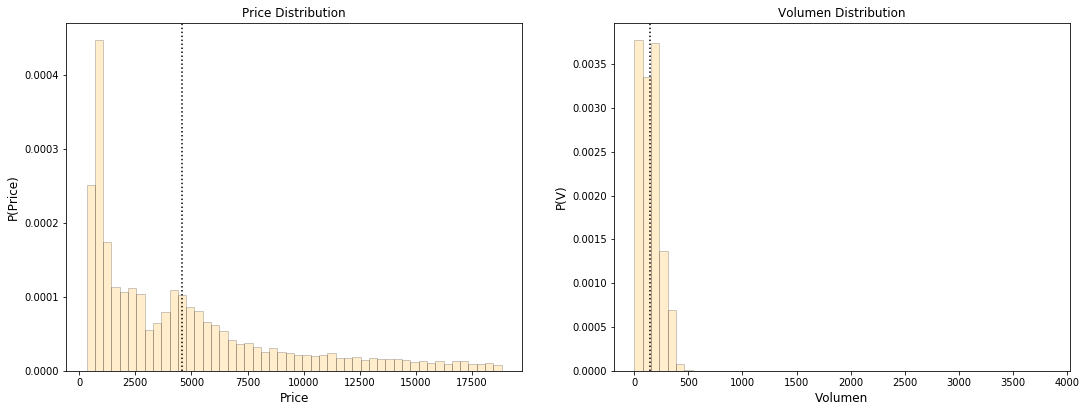

In [90]:
## Premium
distribution_comparison(listas=[df2['price'],df2['V']],couleur='orange')

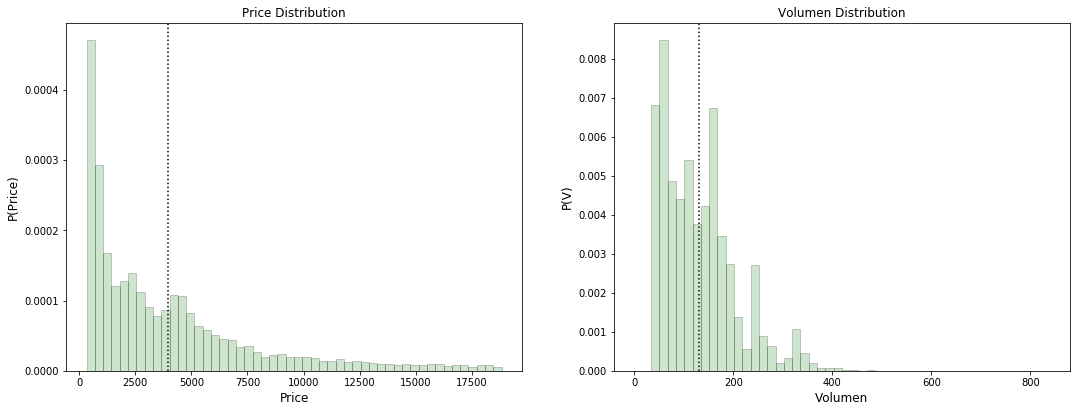

In [92]:
## Very Good
distribution_comparison(listas=[df3['price'],df3['V']],couleur='green')

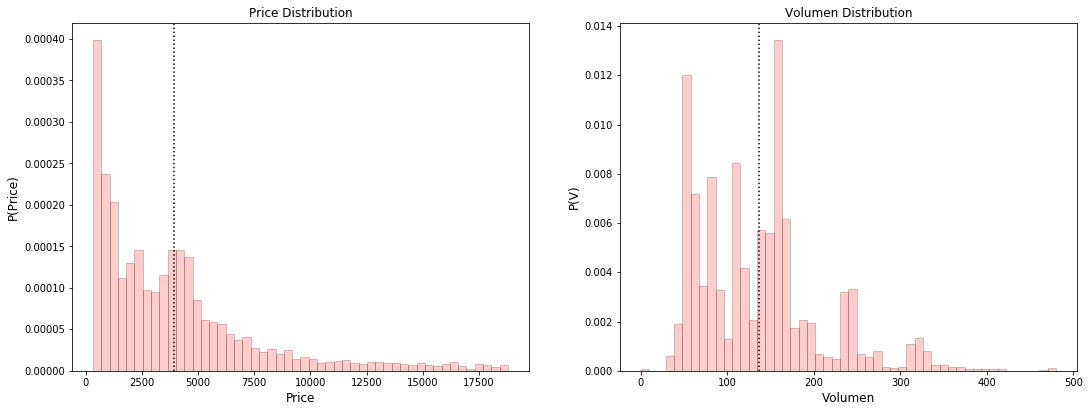

In [95]:
## Good
distribution_comparison(listas=[df4['price'],df4['V']],couleur='red')

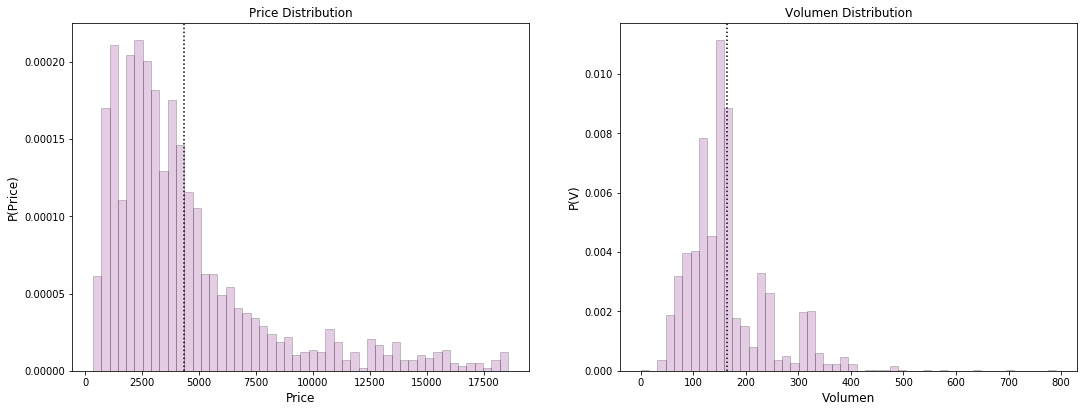

In [96]:
## Fair
distribution_comparison(listas=[df5['price'],df5['V']],couleur='purple')

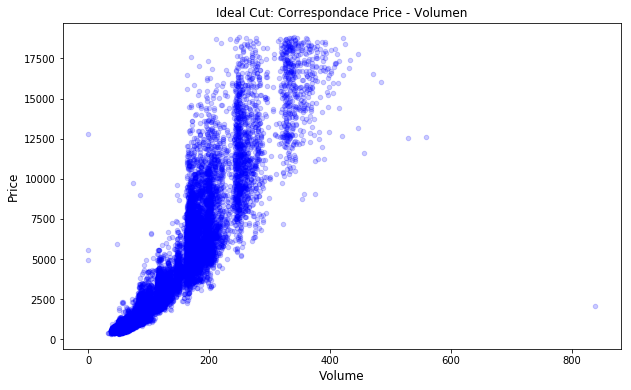

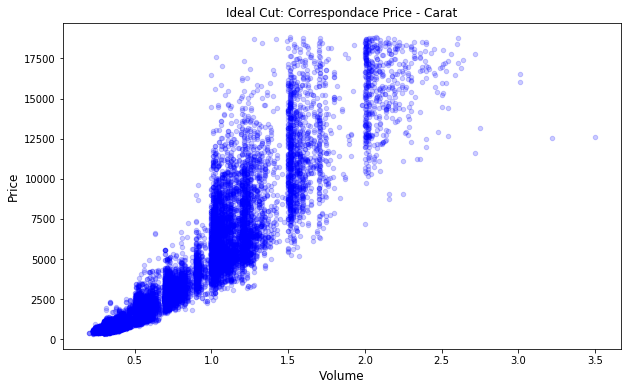

In [134]:
## It doesnt look too much linear but it might be a good approx
correspondance(df1['price'], df1['V'],titulo = 'Ideal Cut: Correspondace Price - Volumen')
correspondance(df1['price'], df1['carat'],titulo = 'Ideal Cut: Correspondace Price - Carat')

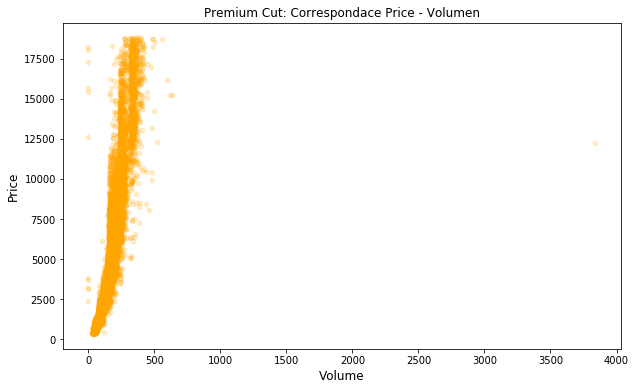

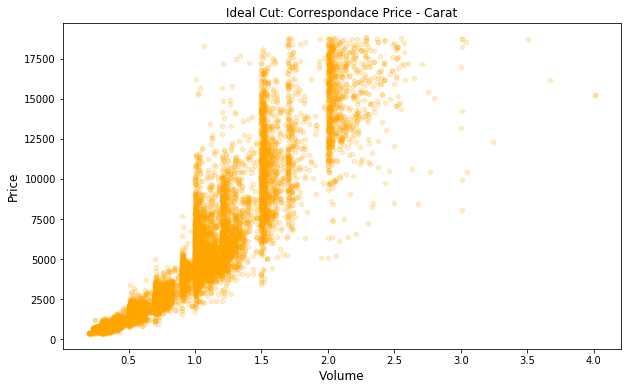

In [126]:
correspondance(df2['price'], df2['V'],titulo = 'Premium Cut: Correspondace Price - Volumen',color='orange')
### A line!
correspondance(df2['price'], df2['carat'],titulo = 'Ideal Cut: Correspondace Price - Carat',color='orange')

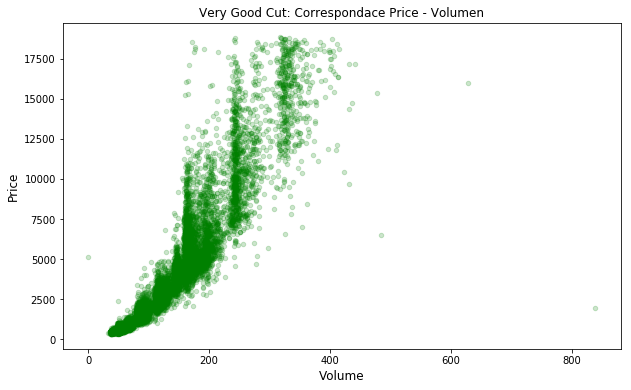

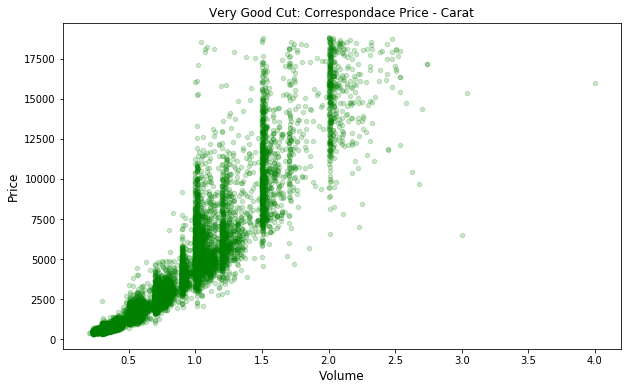

In [127]:
correspondance(df3['price'], df3['V'],titulo = 'Very Good Cut: Correspondace Price - Volumen',color='green')
correspondance(df3['price'], df3['carat'],titulo = 'Very Good Cut: Correspondace Price - Carat',color='green')

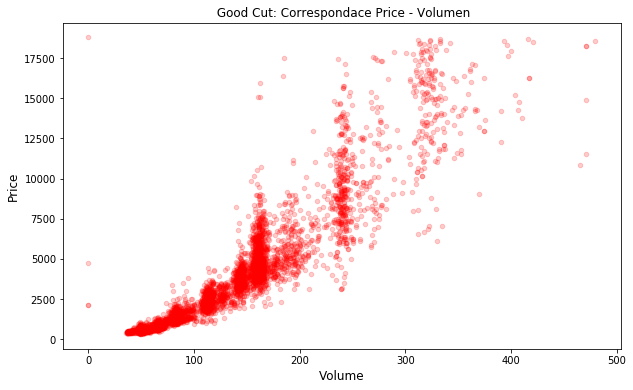

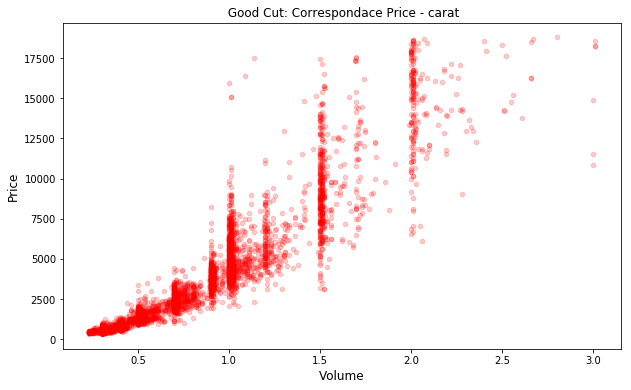

In [128]:
correspondance(df4['price'], df4['V'],titulo = ' Good Cut: Correspondace Price - Volumen',color='red')
correspondance(df4['price'], df4['carat'],titulo = ' Good Cut: Correspondace Price - carat',color='red')


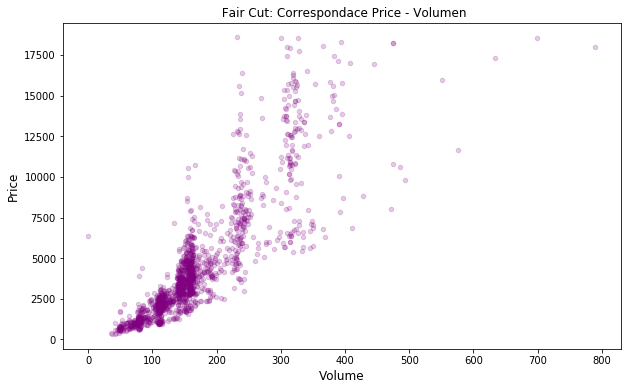

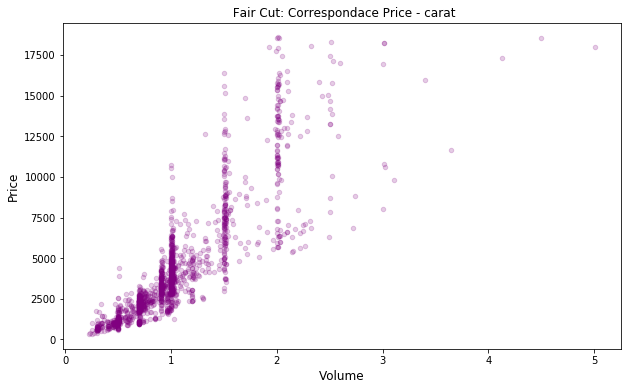

In [129]:
correspondance(df5['price'], df5['V'],titulo = ' Fair Cut: Correspondace Price - Volumen',color='purple')
correspondance(df5['price'], df5['carat'],titulo = ' Fair Cut: Correspondace Price - carat',color='purple')


### Se me acabo el tiempo :( ay!,  Podriamos ajustar un modeo lineal, si bien no es la mejor idea, cuando el corte es Premium parece una muy buena aproximación, con esta aproximación data un volumen podemos obtener un precio, de igual manera esto podria funcionar, en algunos casos para estimar los quilates, se puede extender a los demas valores.
### Podriamos graficar todo y estimar un modelos de vecinos cercanos, en el cual dado un nuevo punto podramos estimar a que calidad de corter pertenece